1.  Analyzing Student Performance:  
Scenario: You are analyzing factors that affect student performance in a standardized test. You collect data on study hours, attendance rates, and socioeconomic background.  
Question: How would you set up your linear regression model? What considerations would you make regarding the interpretation of coefficients in this context?




In [11]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = {
    "Test_Score": [80, 85, 78, 92, 88],
    "Study_Hours": [10, 12, 9, 15, 14],
    "Attendance_Rate": [0.9, 0.95, 0.85, 1.0, 0.98],
    "Socioeconomic_Index": [50, 60, 45, 70, 65]
}

In [5]:
df = pd.DataFrame(data)


In [6]:
X = df[["Study_Hours", "Attendance_Rate", "Socioeconomic_Index"]]
X = sm.add_constant(X)  # Add constant for intercept
y = df["Test_Score"]

In [7]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Test_Score   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     67.50
Date:                Sun, 17 Nov 2024   Prob (F-statistic):             0.0892
Time:                        11:14:17   Log-Likelihood:                -1.9738
No. Observations:                   5   AIC:                             11.95
Df Residuals:                       1   BIC:                             10.39
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  84.7632    

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


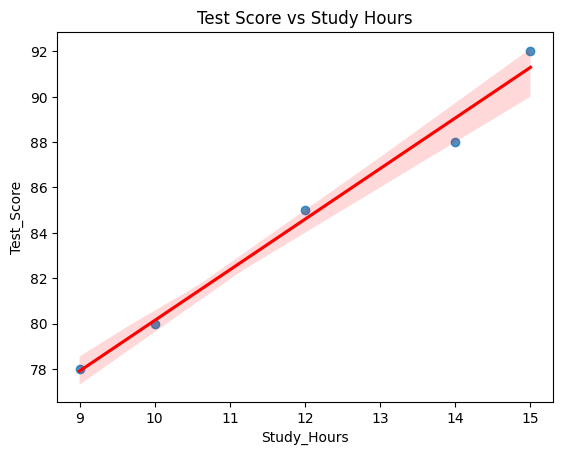

In [8]:
sns.regplot(x="Study_Hours", y="Test_Score", data=df, line_kws={"color": "red"})
plt.title("Test Score vs Study Hours")
plt.show()

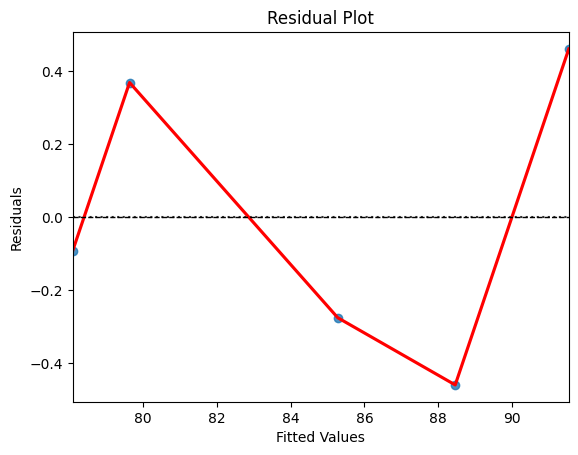

In [9]:
residuals = model.resid
fitted = model.fittedvalues
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={"color": "red"})
plt.axhline(0, linestyle="--", color="black", linewidth=1)
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

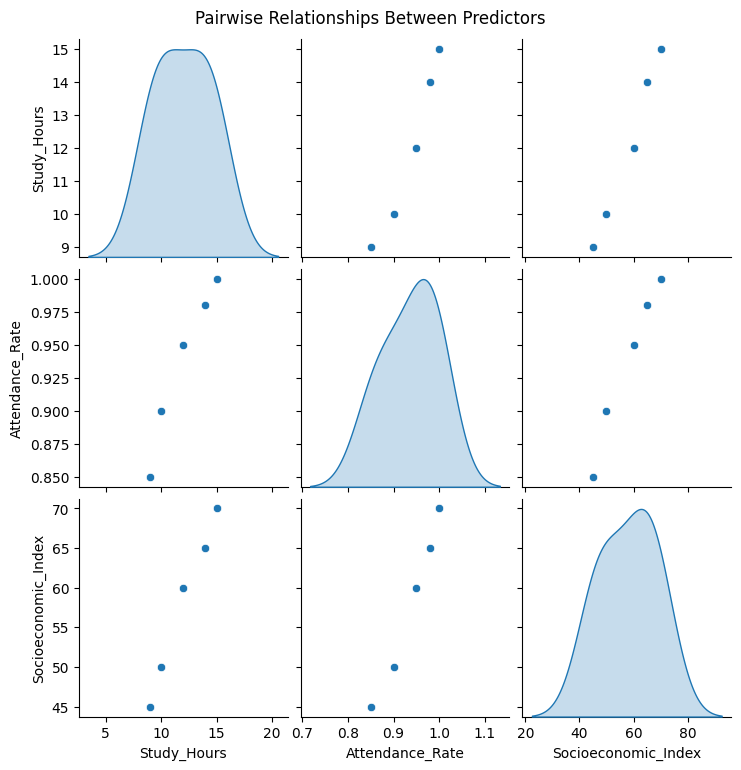

In [10]:
sns.pairplot(df, vars=["Study_Hours", "Attendance_Rate", "Socioeconomic_Index"], diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Predictors", y=1.02)
plt.show()

2. Time Series Data  
Scenario: You have monthly data on electricity consumption over several years and want to predict future consumption based on trends and seasonal patterns.  
 Question: Can linear regression be effectively used in this scenario? If so, how would you incorporate time as a variable in your model?


In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [13]:
data = {
    "Month": pd.date_range(start="2018-01-01", periods=48, freq="M"),
    "Consumption": [
        150, 160, 170, 180, 210, 220, 200, 190, 180, 170, 160, 150,
        155, 165, 175, 185, 215, 225, 205, 195, 185, 175, 165, 155,
        160, 170, 180, 190, 220, 230, 210, 200, 190, 180, 170, 160,
        165, 175, 185, 195, 225, 235, 215, 205, 195, 185, 175, 165
    ]
}

<ipython-input-13-62caca616570>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Month": pd.date_range(start="2018-01-01", periods=48, freq="M"),


In [14]:
df = pd.DataFrame(data)
df["Time_Index"] = np.arange(len(df))
df["Month_Sin"] = np.sin(2 * np.pi * df["Time_Index"] / 12)
df["Month_Cos"] = np.cos(2 * np.pi * df["Time_Index"] / 12)

X = df[["Time_Index", "Month_Sin", "Month_Cos"]]
X = sm.add_constant(X)  # Add intercept
y = df["Consumption"]

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Consumption   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           1.54e-25
Time:                        11:19:44   Log-Likelihood:                -153.69
No. Observations:                  48   AIC:                             315.4
Df Residuals:                      44   BIC:                             322.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        175.9102      1.792     98.164      0.0

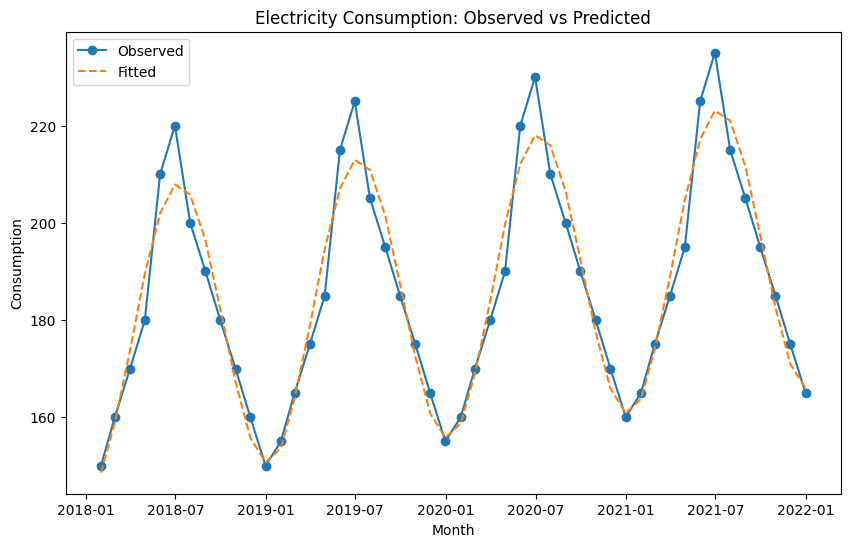

In [15]:

df["Fitted"] = model.fittedvalues
plt.figure(figsize=(10, 6))
plt.plot(df["Month"], df["Consumption"], label="Observed", marker="o")
plt.plot(df["Month"], df["Fitted"], label="Fitted", linestyle="--")
plt.title("Electricity Consumption: Observed vs Predicted")
plt.xlabel("Month")
plt.ylabel("Consumption")
plt.legend()
plt.show()


3. Evaluating Marketing Strategies  
Scenario: A marketing team has created a decision tree to evaluate different advertising strategies for a new product launch.  
Question: How would you assess the effectiveness of the current decision tree structure? What specific metrics or outcomes would you analyze to determine if any adjustments are necessary?


In [21]:
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
class_labels = np.unique(y)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

         150       0.00      0.00      0.00       0.0
         155       0.00      0.00      0.00       1.0
         160       0.00      0.00      0.00       1.0
         165       0.00      0.00      0.00       0.0
         170       0.00      0.00      0.00       1.0
         175       0.00      0.00      0.00       1.0
         180       0.00      0.00      0.00       4.0
         185       0.00      0.00      0.00       0.0
         190       0.00      0.00      0.00       1.0
         195       0.00      0.00      0.00       2.0
         200       0.00      0.00      0.00       1.0
         205       0.00      0.00      0.00       1.0
         210       0.00      0.00      0.00       1.0
         220       0.00      0.00      0.00       0.0
         225       0.00      0.00      0.00       1.0
         230       0.00      0.00      0.00       0.0

    accuracy                           0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

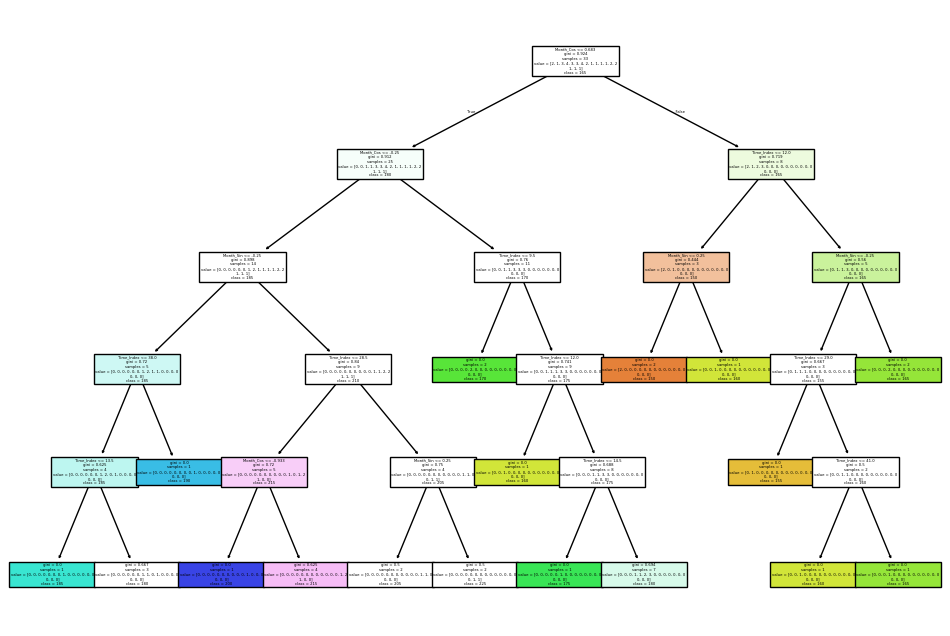

In [28]:
class_names = [str(label) for label in class_labels]

plt.figure(figsize=(12, 8))
plot_tree(model,feature_names=X.columns,class_names=class_names,filled=True)
plt.show()

4. Financial Investment Decisions  
Scenario: An investment firm uses a decision tree to analyze potential investment opportunities based on market trends and economic indicators.  
Question: What process would you follow to update the decision tree as market conditions change? How would you visualize these changes for clarity among team members?


In [29]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [30]:
data_old = {
    "Market_Trend": [1, 0, 1, 0, 1],
    "Economic_Indicator": [3.2, 2.8, 3.6, 2.4, 3.0],
    "Investment": [1, 0, 1, 0, 1]
}
df_old = pd.DataFrame(data_old)
X_old = df_old[["Market_Trend", "Economic_Indicator"]]
y_old = df_old["Investment"]

In [31]:
data_new = {
    "Market_Trend": [1, 1, 0, 0, 1, 1],
    "Economic_Indicator": [3.5, 3.8, 2.6, 2.9, 3.3, 3.7],
    "Investment": [1, 1, 0, 0, 1, 1]
}
df_new = pd.DataFrame(data_new)
X_new = df_new[["Market_Trend", "Economic_Indicator"]]
y_new = df_new["Investment"]


In [32]:
old_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
old_tree.fit(X_old, y_old)

new_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
new_tree.fit(X_new, y_new)

plt.figure(figsize=(20, 8))

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

Text(0.5, 1.0, 'Old Decision Tree')

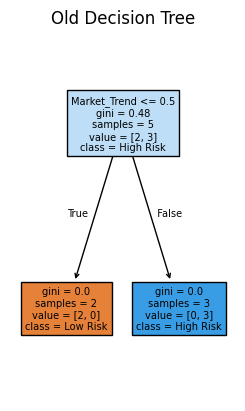

In [33]:
plt.subplot(1, 2, 1)
plot_tree(old_tree, feature_names=X_old.columns, class_names=["Low Risk", "High Risk"], filled=True)
plt.title("Old Decision Tree")


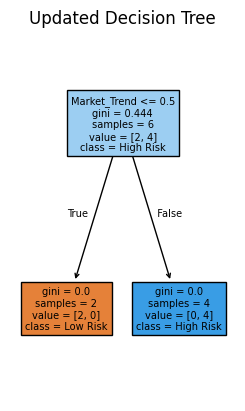

In [34]:
plt.subplot(1, 2, 2)
plot_tree(new_tree, feature_names=X_new.columns, class_names=["Low Risk", "High Risk"], filled=True)
plt.title("Updated Decision Tree")

plt.show()

In [35]:
old_importances = old_tree.feature_importances_
new_importances = new_tree.feature_importances_
features = X_new.columns

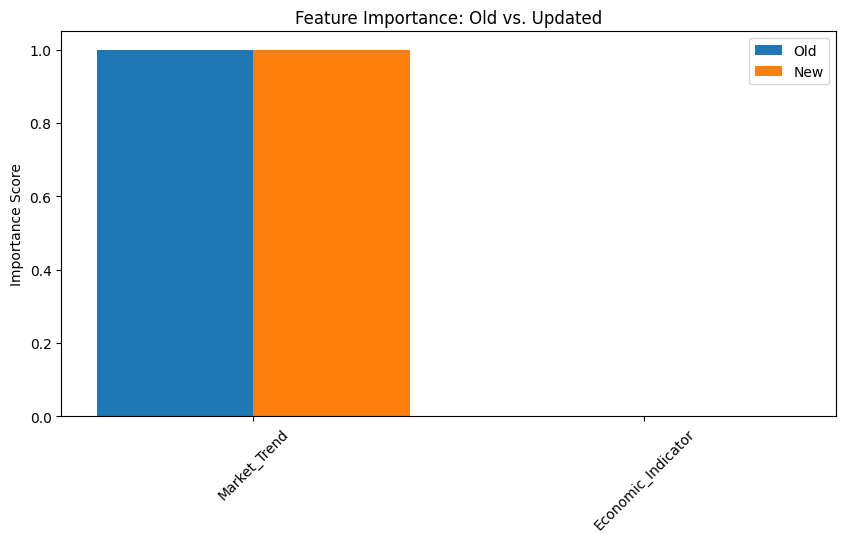

In [36]:
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(features)) - 0.2, old_importances, width=0.4, label="Old")
plt.bar(np.arange(len(features)) + 0.2, new_importances, width=0.4, label="New")
plt.xticks(np.arange(len(features)), features, rotation=45)
plt.title("Feature Importance: Old vs. Updated")
plt.ylabel("Importance Score")
plt.legend()
plt.show()

5. Disease Diagnosis  
Scenario: A healthcare provider uses patient data (symptoms, age, medical history) to diagnose diseases using K-NN.  
Question: What considerations should you take into account when choosing the value of $$ K $$? How would you ensure that the model is robust against overfitting?


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [51]:
data = {
    "Age": [25, 35, 45, 20, 30, 40, 50],
    "Symptom1": [1, 0, 1, 1, 0, 1, 0],
    "Symptom2": [0, 1, 1, 0, 1, 0, 1],
    "History": [1, 1, 0, 1, 0, 0, 1],
    "Disease": [0, 1, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

In [52]:
X = df.drop("Disease", axis=1)
y = df["Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Use StratifiedKFold with 3 splits or less (adjusted based on minimum class count)

    # Get the minimum number of samples in each class
    min_class_count = min(y_train.value_counts())

    # Ensure n_splits is at least 2 and not greater than the minimum class count or 3
    n_splits = min(3, max(2, min_class_count))  # Ensure n_splits is at least 2

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=skf, scoring='accuracy')
    scores.append(np.mean(cv_scores))
    print(f"k = {k}, Mean Cross-Validation Score: {np.mean(cv_scores)}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metric

k = 1, Mean Cross-Validation Score: 0.75
k = 2, Mean Cross-Validation Score: 0.25
k = 3, Mean Cross-Validation Score: nan
k = 4, Mean Cross-Validation Score: nan
k = 5, Mean Cross-Validation Score: nan
k = 6, Mean Cross-Validation Score: nan
k = 7, Mean Cross-Validation Score: nan
k = 8, Mean Cross-Validation Score: nan
k = 9, Mean Cross-Validation Score: nan
k = 10, Mean Cross-Validation Score: nan
k = 11, Mean Cross-Validation Score: nan
k = 12, Mean Cross-Validation Score: nan
k = 13, Mean Cross-Validation Score: nan
k = 14, Mean Cross-Validation Score: nan
k = 15, Mean Cross-Validation Score: nan
k = 16, Mean Cross-Validation Score: nan
k = 17, Mean Cross-Validation Score: nan
k = 18, Mean Cross-Validation Score: nan
k = 19, Mean Cross-Validation Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 211, in _get_response_values
    y_pred = prediction_method(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 259, in predict
    probabilities = self.predict_proba(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classifi

In [59]:
best_k = k_range[np.argmax(scores)]
print(f"Optimal K: {best_k}")

Optimal K: 3


6. Image Classification**  
  Scenario: You are developing an application that classifies images of animals (e.g., cats vs. dogs) using K-NN.  
Question: Given the high dimensionality of image data, what techniques could you use to optimize the performance of K-NN? How would you measure the accuracy of your model?


In [60]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [61]:
np.random.seed(42)
X = np.random.rand(200, 4096)  # 200 samples, 64x64 images flattened (4096 features)
y = np.random.choice([0, 1], size=200)  # Binary labels: 0 for cats, 1 for dogs


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [63]:
pca = PCA(n_components=50)  # Retain top 50 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

In [65]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring="accuracy")
    scores.append(np.mean(cv_scores))


In [66]:
optimal_k = k_range[np.argmax(scores)]
print(f"Optimal K: {optimal_k}")

Optimal K: 18


In [67]:
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)
y_pred = knn_final.predict(X_test_scaled)


In [68]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.43333333333333335
Confusion Matrix:
 [[16 10]
 [24 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.62      0.48        26
           1       0.50      0.29      0.37        34

    accuracy                           0.43        60
   macro avg       0.45      0.45      0.43        60
weighted avg       0.46      0.43      0.42        60



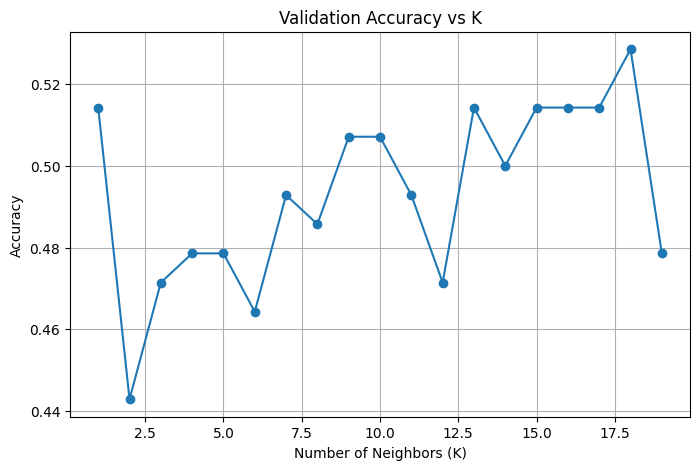

In [69]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker="o")
plt.title("Validation Accuracy vs K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


7. Credit Risk Assessment  
Scenario: A bank uses logistic regression to determine the probability of a loan applicant defaulting on their loan based on their credit score, income level, and employment status.  
Question: How would you interpret the coefficients of your logistic regression model in this context? What implications do these coefficients have for risk assessment?


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [71]:
data = {
    "Credit_Score": [700, 650, 600, 720, 580, 630, 750, 670, 590, 710],
    "Income_Level": [50, 40, 30, 60, 25, 35, 70, 45, 20, 55],
    "Employment_Status": [1, 0, 0, 1, 0, 0, 1, 1, 0, 1],  # 1 = Employed, 0 = Unemployed
    "Default": [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]  # 1 = Default, 0 = No Default
}
df = pd.DataFrame(data)

In [72]:
X = df[["Credit_Score", "Income_Level", "Employment_Status"]]
y = df["Default"]


In [78]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [79]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [80]:
coefficients = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": model.coef_[0],
    "Odds Ratio": np.exp(model.coef_[0])
})
print(coefficients)

            Variable  Coefficient  Odds Ratio
0       Credit_Score    -0.184152    0.831809
1       Income_Level    -0.046895    0.954188
2  Employment_Status    -0.002984    0.997020


In [81]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1 1]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [82]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 1.0


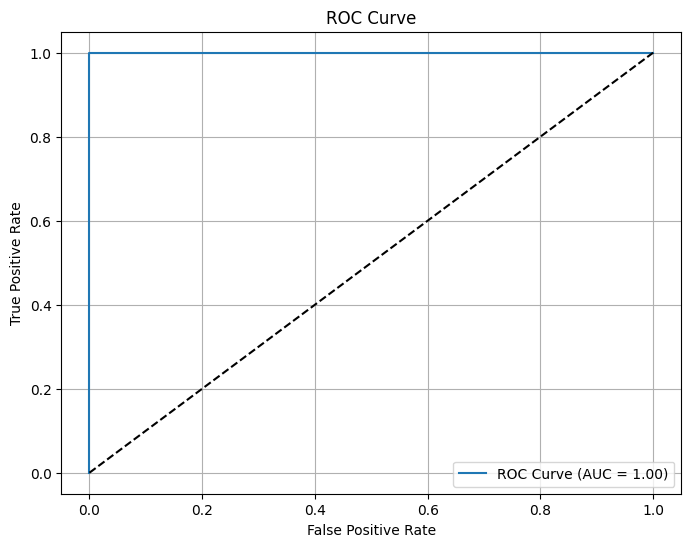

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

8. Email Classification  
Scenario: You are tasked with building a spam filter using SVM to classify emails as either "spam" or "not spam."  
Question: How would you decide between using a linear SVM and a non-linear SVM for this classification problem? What features would you consider important for your model?


In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [92]:
X = df[["Credit_Score", "Income_Level", "Employment_Status"]]
y = df["Default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [93]:
model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": model.coef_[0],
    "Odds Ratio": np.exp(model.coef_[0])
})
print(coefficients)


            Variable  Coefficient  Odds Ratio
0       Credit_Score    -0.165851    0.847172
1       Income_Level    -0.035568    0.965057
2  Employment_Status    -0.002340    0.997663


In [94]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[0 0]
 [1 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [95]:
try:
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("ROC-AUC Score:", roc_auc)
except ValueError:
    print("Only one class present in y_test. ROC AUC score is not defined in that case.")

Only one class present in y_test. ROC AUC score is not defined in that case.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


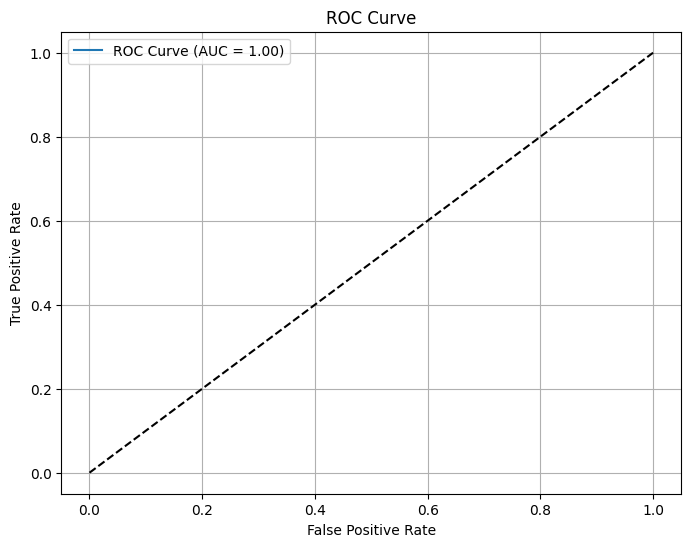

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

9. Real Estate Price Prediction  
Scenario: A real estate company wants to predict house prices based on features like location, size, and number of bedrooms.  
Question: If your model's R-squared value is 0.85, what does this indicate about the model's performance? Are there any limitations to using R-squared as the sole metric?



In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [98]:
data = {
    "Location": [1, 2, 1, 3, 2, 1, 3, 2, 3, 1],
    "Size": [1200, 1500, 1100, 1700, 1350, 1250, 1650, 1400, 1750, 1150],
    "Bedrooms": [2, 3, 2, 4, 3, 2, 4, 3, 4, 2],
    "Price": [300000, 400000, 280000, 500000, 350000, 310000, 480000, 370000, 520000, 290000],
}
df = pd.DataFrame(data)

In [99]:
X = df[["Location", "Size", "Bedrooms"]]
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [101]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared: 0.9733597848795253
Adjusted R-squared: 1.0532804302409493
Mean Absolute Error (MAE): 13255.813953488367
Root Mean Squared Error (RMSE): 14040.569500255777


In [102]:
residuals = y_test - y_pred
print("\nResiduals:\n", residuals)


Residuals:
 8     7209.302326
1   -18449.612403
5   -14108.527132
Name: Price, dtype: float64


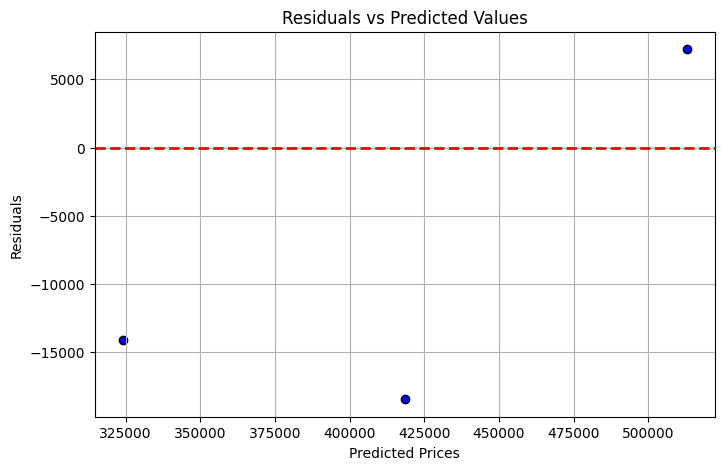

In [103]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color="blue", edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.grid()
plt.show()

10. Gene Expression Analysis  
Scenario: In a biological study, researchers have collected gene expression data from thousands of genes across multiple samples.  
Question: How would PCA help in identifying key patterns or variations in gene expression? What challenges might arise when interpreting the principal components?

In [104]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [105]:
np.random.seed(42)
data = {
    f"Gene_{i}": np.random.rand(10) * 100 for i in range(1, 101)
}
df = pd.DataFrame(data)
df.index = [f"Sample_{i}" for i in range(1, 11)]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [106]:
pca = PCA(n_components=10)
pca_result = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


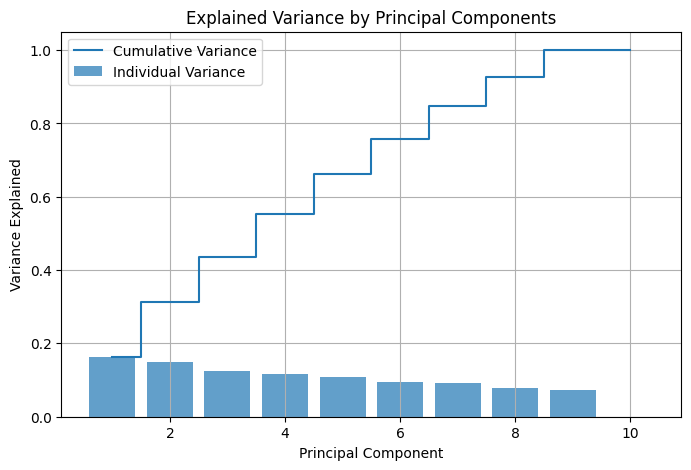

In [107]:
pca_df = pd.DataFrame(
    data=pca_result,
    columns=[f"PC{i+1}" for i in range(pca_result.shape[1])],
    index=df.index
)

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label="Individual Variance")
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where="mid", label="Cumulative Variance")
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid()
plt.show()

<ipython-input-108-756d3c775ed1>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(pca_df["PC1"][i] + 0.2, pca_df["PC2"][i], sample, fontsize=9)


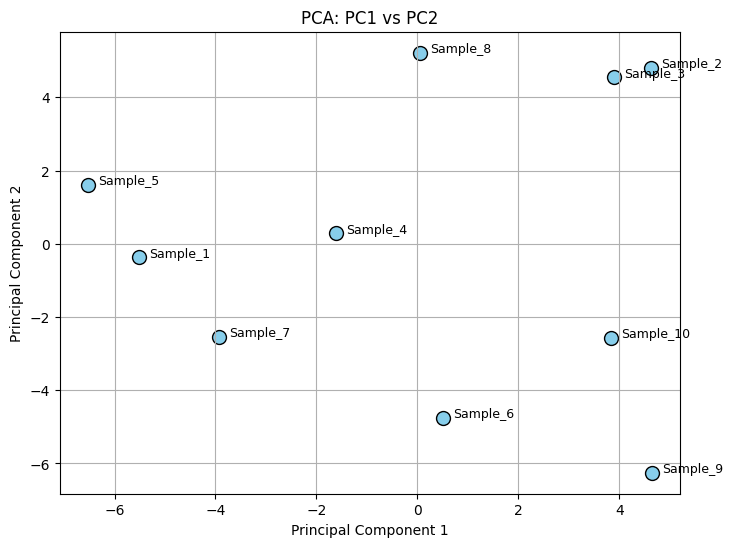

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], edgecolor="k", color="skyblue", s=100)
for i, sample in enumerate(pca_df.index):
    plt.text(pca_df["PC1"][i] + 0.2, pca_df["PC2"][i], sample, fontsize=9)
plt.title("PCA: PC1 vs PC2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


In [109]:

loading_scores = pd.Series(pca.components_[0], index=df.columns)
top_genes = loading_scores.nlargest(10)
print("Top 10 Genes Contributing to PC1:\n", top_genes)

Top 10 Genes Contributing to PC1:
 Gene_76    0.213820
Gene_36    0.200216
Gene_20    0.185570
Gene_1     0.175194
Gene_2     0.172984
Gene_42    0.167157
Gene_25    0.165567
Gene_44    0.156590
Gene_61    0.149967
Gene_68    0.139858
dtype: float64


11.Weather Prediction  
Scenario: You create a simple linear regression model to predict daily temperatures based on historical weather data.  
Question: If your predictions are consistently inaccurate because they do not capture seasonal variations, what does this indicate about bias? How might you improve your model's accuracy?


In [111]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [112]:
np.random.seed(42)
data = {
    "DayOfYear": np.arange(1, 366),
    "Temperature": 15 + 10 * np.sin(2 * np.pi * np.arange(1, 366) / 365) + np.random.normal(0, 2, 365),
}
df = pd.DataFrame(data)

df["Sin_DayOfYear"] = np.sin(2 * np.pi * df["DayOfYear"] / 365)
df["Cos_DayOfYear"] = np.cos(2 * np.pi * df["DayOfYear"] / 365)

In [113]:
X = df[["DayOfYear", "Sin_DayOfYear", "Cos_DayOfYear"]]
y = df["Temperature"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [114]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.6942673225142035


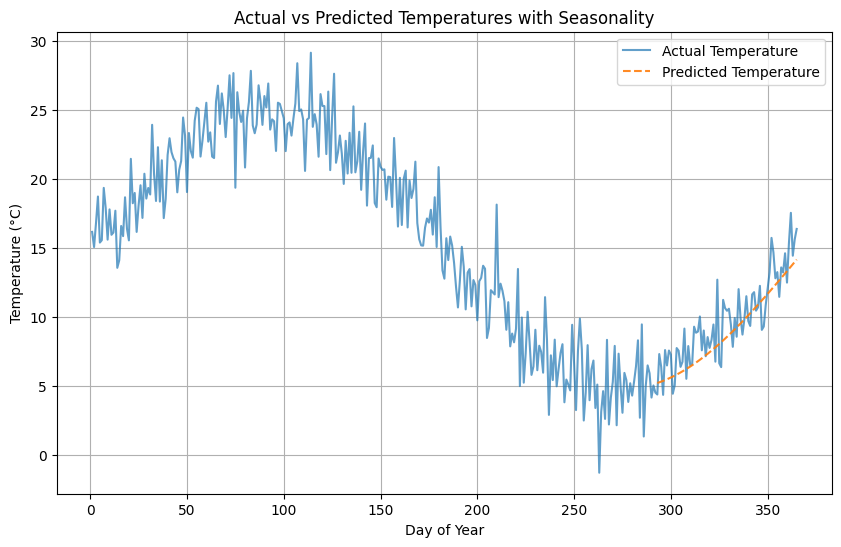

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(df["DayOfYear"], df["Temperature"], label="Actual Temperature", alpha=0.7)
plt.plot(df["DayOfYear"][len(X_train):], y_pred, label="Predicted Temperature", alpha=0.9, linestyle="--")
plt.title("Actual vs Predicted Temperatures with Seasonality")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

12. Predicting Credit Card Fraud
Scenario: A financial institution is using logistic regression to identify fraudulent transactions based on transaction amount, location, and user behavior.  
Question: In setting up your data pipeline, how would you ensure that the model is trained on balanced classes? What techniques could you employ to address class imbalance?


Class distribution in the training set (before balancing):
Fraudulent
0.0    665
1.0     35
Name: count, dtype: int64

Classification Report (Including Precision, Recall, F1-Score):
              precision    recall  f1-score   support

         0.0       0.96      0.55      0.70       285
         1.0       0.06      0.53      0.11        15

    accuracy                           0.55       300
   macro avg       0.51      0.54      0.40       300
weighted avg       0.91      0.55      0.67       300


Confusion Matrix:
[[156 129]
 [  7   8]]

ROC AUC Score: 0.6011695906432748


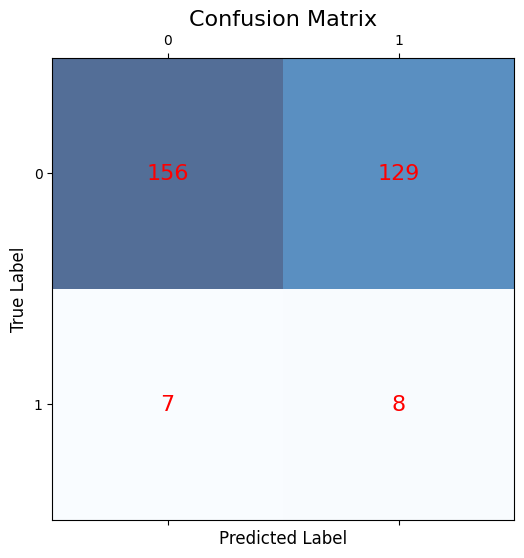

In [129]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.utils import resample
import matplotlib.pyplot as plt

np.random.seed(42)
data = {
    "TransactionAmount": np.random.lognormal(mean=5, sigma=2, size=1000),
    "Location": np.random.choice(['Location_A', 'Location_B', 'Location_C'], size=1000),
    "UserBehavior": np.random.choice([0, 1], size=1000),
    "Fraudulent": np.concatenate([np.zeros(950), np.ones(50)])
}
df = pd.DataFrame(data)

df = pd.get_dummies(df, columns=['Location'], drop_first=True)

X = df.drop(columns=['Fraudulent'])
y = df['Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Class distribution in the training set (before balancing):")
print(y_train.value_counts())

train_data = pd.concat([X_train, y_train], axis=1)

fraudulent = train_data[train_data['Fraudulent'] == 1]
non_fraudulent = train_data[train_data['Fraudulent'] == 0]

fraudulent_upsampled = resample(fraudulent,
                                replace=True,
                                n_samples=len(non_fraudulent),
                                random_state=42)

train_data_balanced = pd.concat([non_fraudulent, fraudulent_upsampled])

X_train_balanced = train_data_balanced.drop(columns=['Fraudulent'])
y_train_balanced = train_data_balanced['Fraudulent']

model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(X_train_balanced, y_train_balanced)

y_pred = model.predict(X_test)

print("\nClassification Report (Including Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap='Blues', alpha=0.7)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', fontsize=16, color='red')
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()
